In [2]:
using Graphs, MetaGraphsNext

includet("../../utils/import_utils.jl")
includet("../../utils/visu.jl")
includet("io.jl")
#includet("io.jl")

In [5]:
function read_gml_file(file_path::String)
    open(file_path, "r") do file
        return read(file, String)
    end
end

function get_graph_from_gml(path)
    gml_content = read_gml_file(path)

    g = Graph()

    gml_splitted = split(gml_content, '\n')
    i_line = 1
    name = "unknown-network"

    while i_line < length(gml_splitted)
        line = strip(gml_splitted[i_line])

        if startswith(line, "Network ") 
            key, name = split(line, " ")
            name = strip(name, ['"'])
        end


        if startswith(line, "node") 
            add_vertex!(g)
        end

        if startswith(line, "edge")
            i_line += 1
            line = strip(gml_splitted[i_line])
            key, src = split(line, " ")
            i_line += 1
            line = strip(gml_splitted[i_line])
            key, dst = split(line, " ")
            add_edge!(g, parse(Int, src)+1, parse(Int, dst)+1)
        end

        i_line = i_line+1
    end

    return g, name
end


get_graph_from_gml (generic function with 1 method)

In [6]:
function put_as_substrate_and_save(g)
    mg = MetaGraph(
        Graph(),
        Int,
        Dict,
        Dict,
        Dict(:name=>"s_" * name, :type=>"substrate")
    )

    for node in vertices(g)
        cap_to_put = 1
        cost_to_put = rand(2:4)
        add_vertex!(mg, node, Dict(:cap=> cap_to_put, :cost => cost_to_put))
    end

    for edge in edges(g)
        cap_to_put = rand(2:4)
        cost_to_put = rand(2:4)
        add_edge!(mg, src(edge), dst(edge), Dict(:cap=>cap_to_put, :cost =>cost_to_put))
    end

    write_network_to_json(mg, false)
end


put_as_substrate_and_save (generic function with 1 method)

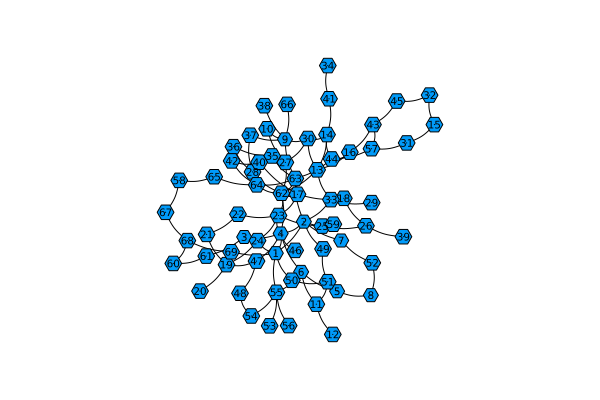

In [5]:
path = "topologyzoo/Uninett2011.gml"

g, name = get_graph_from_gml(path)

visu_graph(g)

In [123]:
println("Graph with $(nv(g)) nodes and $(ne(g)) arretes")

Graph with 25 nodes and 26 arretes


In [7]:
put_as_substrate_and_save(g)

7647

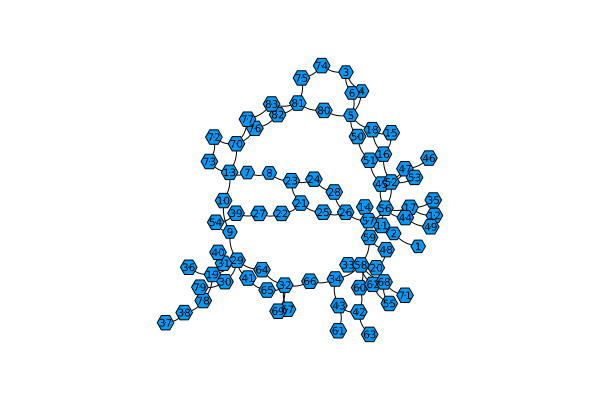

In [100]:
rem_vertex!(g, 7)

visu_graph(g)